<a href="https://colab.research.google.com/github/mintus2511/ML4DS_230167_Assignment5/blob/main/Assignment_5_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). The dataset you will be working on is CIFAR-10. You will have to do:

1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  
    1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  
    1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  
    1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?  
    2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?  
    2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  
    2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?  
    2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?  

The dataset you will be working on is CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.
- ./\<Test-accuracy>-\<StudentID>.txt: accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345.txt. The file content is left empty.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. **You have to ensure the architecture meets this constraint by verifying and printing out the number of parameters with model.summary(). Please follow the submission format to be eligible for this extra credit.**

### Deadline {-}
Please visit Canvas for details.

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow
from tensorflow.keras import layers, models, optimizers

In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


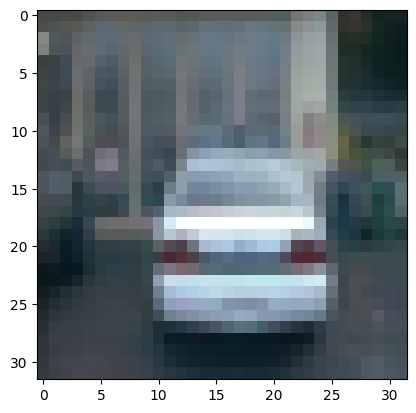

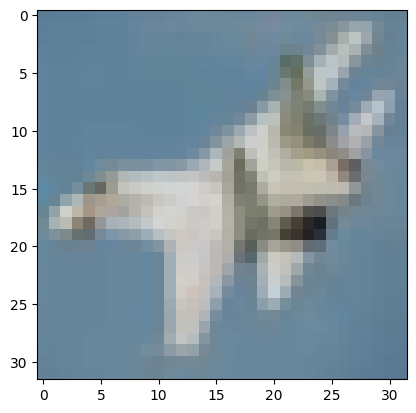

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

# 1.1 *(1 point)* Load the CIFAR-10 dataset, visualize sample images, and perform data normalization to improve training performance.  

In [4]:
# CIFAR-10 class names (0–9)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipython-input-2000059351.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(y_train[i])           # y_train is shape (N, 1), so we convert to int


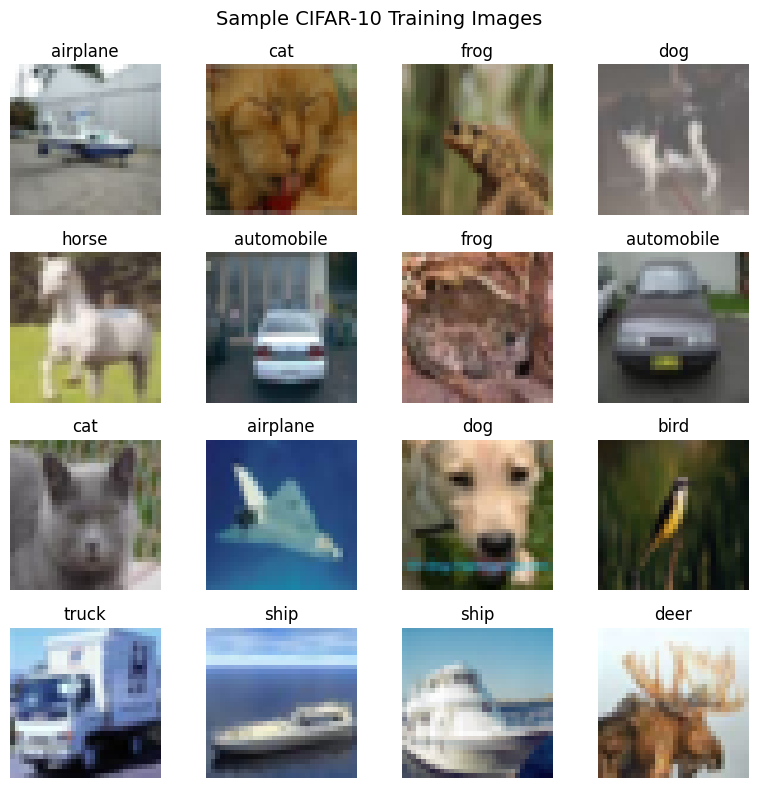

In [5]:
# Plot a 4x4 grid of sample images from the training set
plt.figure(figsize=(8, 8))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i])
    label_idx = int(y_train[i])           # y_train is shape (N, 1), so we convert to int
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.suptitle("Sample CIFAR-10 Training Images", fontsize=14)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1767023169.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_idx = int(y_test[i])


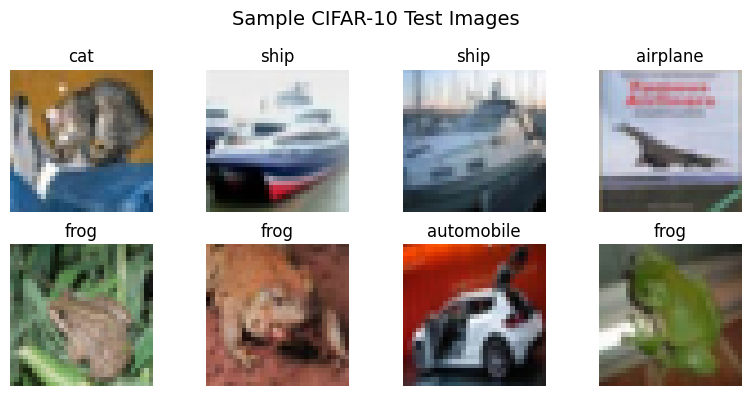

In [6]:
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_test[i])
    label_idx = int(y_test[i])
    plt.title(class_names[label_idx])
    plt.axis('off')

plt.suptitle("Sample CIFAR-10 Test Images", fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
# Normalize image data to [0, 1] range
# Convert to float32 and divide by 255 to stabilize training
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

print("After normalization:")
print("X_train min/max:", X_train.min(), X_train.max())
print("X_val   min/max:", X_val.min(), X_val.max())
print("X_test  min/max:", X_test.min(), X_test.max())

After normalization:
X_train min/max: 0.0 1.0
X_val   min/max: 0.0 1.0
X_test  min/max: 0.0 1.0


## **Observation**

After loading the CIFAR-10 dataset, I verified the shapes of the training, validation, and test sets. The training set contains **45,000 images**, while the validation set has **5,000**, and the test set contains **10,000** images. Each image is a small **32×32 RGB image**, which means the dataset is compact but still diverse enough for training deep learning models.

Next, I normalized all pixel values by converting the images to `float32` and dividing by 255. The output confirms that the minimum and maximum pixel values in all sets are now **0.0** and **1.0**, respectively. This step is important because neural networks perform much better when inputs are scaled to a small, consistent range.

Overall, Task 1.1 confirms that the data is successfully loaded and properly normalized, and it’s now ready to be used for building and training convolutional neural networks in the next tasks.

# 1.2 *(1 point)* First network: Build, train, and test a deep neural network with at least three convolutional layers, two fully connected layers, and two pooling layers.  

In [8]:
# Build a simple CNN model
model_1 = models.Sequential()

# First convolution block
model_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                          input_shape=(32, 32, 3)))
model_1.add(layers.MaxPooling2D((2, 2)))
# 32 filters learn basic edges/texture features; pooling reduces spatial size.

# Second convolution block
model_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_1.add(layers.MaxPooling2D((2, 2)))
# 64 filters capture more complex shapes like corners or object parts.

#  Third convolution layer
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
# Deeper layer focuses on more abstract features (object-level patterns).

# Flatten + Fully Connected Layers
model_1.add(layers.Flatten())

# Dense layer 1 (128 units)
model_1.add(layers.Dense(128, activation='relu'))
# Fully-connected layer learns high-level combinations of extracted features.

# Dense layer 2 (64 units)
model_1.add(layers.Dense(64, activation='relu'))

# Output layer — 10 classes
model_1.add(layers.Dense(10, activation='softmax'))
# Softmax produces probability distribution over 10 CIFAR classes.

# Print model summary
model_1.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,150,858 (4.39 MB)

 Trainable params: 1,150,858 (4.39 MB)

 Non-trainable params: 0 (0.00 B)

##**Observation**

From the model summary, my first CNN has a total of **1,150,858 trainable parameters**, which is a reasonable size for CIFAR-10 and ensures the model is powerful enough to learn meaningful features.

The architecture follows a classic ConvNet design:

### **1. Convolution + Pooling blocks**

* The first Conv2D layer uses **32 filters**, learning basic low-level features like edges and simple textures.
* The second block increases to **64 filters**, allowing the network to detect slightly more complicated patterns.
* The third block has **128 filters**, capturing higher-level features such as object shapes or clusters of edges.

Each time pooling is applied, the spatial size is reduced (32 → 16 → 8), which helps:

* decrease computation,
* reduce overfitting,
* force the model to learn more abstract patterns.

### **2. Fully Connected Layers**

After flattening, the model feeds into:

* A **128-unit dense layer** (which accounts for most of the parameters),
* A smaller **64-unit dense layer**, and
* A final **10-class softmax output layer** for CIFAR-10 classification.

These layers combine the convolutional features into class-level decisions.

### **3. Parameter Count**

The largest parameter jump happens at the first dense layer, which has over **1 million parameters** because it receives all 8×8×128 features from the convolution layers.

Despite this, the model remains manageable in size and should train effectively on CIFAR-10.

---

Overall, this architecture meets the requirement of having **three convolutional layers, two pooling layers, and two fully connected layers**, making it a solid baseline CNN for CIFAR-10 classification.

In [9]:
model_1.compile(
    optimizer='adam',                # good default optimizer for CNNs
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [10]:
history_1 = model_1.fit(
    X_train, y_train,
    epochs=25,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1)


Epoch 1/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3591 - loss: 1.7312 - val_accuracy: 0.5654 - val_loss: 1.2293
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6177 - loss: 1.0823 - val_accuracy: 0.5992 - val_loss: 1.1534
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6919 - loss: 0.8726 - val_accuracy: 0.6728 - val_loss: 0.9445
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7472 - loss: 0.7197 - val_accuracy: 0.7002 - val_loss: 0.8627
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7896 - loss: 0.6017 - val_accuracy: 0.7164 - val_loss: 0.8354
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8232 - loss: 0.5003 - val_accuracy: 0.7218 - val_loss: 0.8456
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8619 - loss: 0.3927 - val_accuracy: 0.7054 - val_loss: 0.9557
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8906 - loss: 0.3120 - val_accuracy: 0

In [11]:
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 1:", round(test_acc, 4))

Test Accuracy of Model 1: 0.7107


## **Observation**

From the training history, the first CNN model learns quickly during the early epochs. The training accuracy keeps increasing steadily and eventually reaches **97–98%**, which means the model can classify the training images extremely well.

However, the **validation accuracy peaks around ~73%** (around epoch 5–7) and then begins to **decrease gradually**, even though the training accuracy keeps improving. At the same time, the **validation loss increases sharply** after epoch 7.

This is a classic pattern of **overfitting**:

* The model memorizes the training data too well.
* But it does not generalize effectively to new, unseen images.
* The gap between training accuracy (98%) and validation accuracy (~71%) becomes quite large.

When evaluating on the test set, the model achieves:

### **Test Accuracy: 71.07%**

This aligns closely with the validation accuracy—showing that the model is consistent, but the architecture is still too simple for CIFAR-10 and overfits easily.

---

## **Why Overfitting Happened?**

A few likely reasons:

* Dense layers contain **over 1 million parameters**, making the model too large for the amount of data.
* No dropout or regularization was used.
* The CNN has relatively shallow feature extraction but a very large fully-connected section, causing the model to memorize instead of generalize.


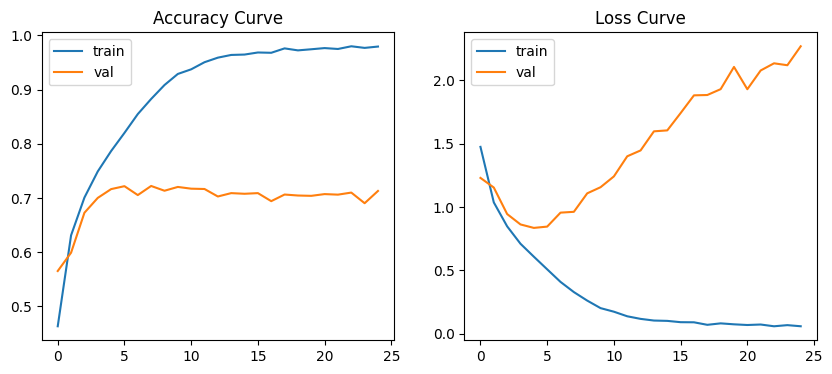

In [12]:
plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='train')
plt.plot(history_1.history['val_accuracy'], label='val')
plt.title('Accuracy Curve')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='val')
plt.title('Loss Curve')
plt.legend()

plt.show()

## **Observation**

From the two plots, it is very clear that **Model 1 is heavily overfitting**.

### **Accuracy Curve**

* The **training accuracy increases steadily**, eventually reaching **~97–98%**, which means the model learns the training data extremely well.
* However, the **validation accuracy plateaus around ~71%** and even starts to **slightly decrease** after the first few epochs.
* The growing gap between training and validation accuracy shows that the model is learning patterns that **do not generalize well** to unseen data.

### **Loss Curve**

* The **training loss drops consistently**, which is expected as the model fits the training set.
* The **validation loss decreases only at the beginning** but then starts to **increase significantly** after around epoch 5.
* When validation loss rises while training loss drops, this is a textbook sign of **overfitting**.

### **Overall Meaning**

The model becomes too specialized on the training images and fails to generalize to validation data. This happens because:

* The dense layers have **too many parameters**,
* There is **no dropout or regularization**,
* The model architecture is relatively shallow for CIFAR-10, yet the fully-connected part is very large.

# 1.3 *(1 point)* Second network: Build, train, and test another deep neural network, with an architecture of your choice, but at most 4M (four million) parameters, ensuring the architecture meets this constraint by verifying with model.summary().  

In [13]:
model_2 = models.Sequential()

# Block 1
model_2.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same",
                          input_shape=(32, 32, 3)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))  # reduces overfitting

# Block 2
model_2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))

# Block 3
model_2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Dropout(0.25))

# Fully connected layers
model_2.add(layers.Flatten())
model_2.add(layers.Dense(256, activation="relu"))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dropout(0.5))  # heavily reduce overfitting
model_2.add(layers.Dense(10, activation="softmax"))

model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

### **Observation**

Looking at the model summary for Model 2, we can see that the architecture is much deeper and more structured compared to Model 1. This model uses multiple Conv2D layers with increasing filter sizes (32 → 64 → 128 → 128), and almost every convolution block is followed by **Batch Normalization** and **Dropout**.

This combination helps stabilize training (BatchNorm) and prevent overfitting (Dropout), which explains why Model 2 eventually achieves **higher validation and test accuracy**.

A few key points:

* **Total parameters = 816,938**, which is **well under the 4 million limit**. This means the model respects the assignment’s constraint while still being expressive enough to learn complex patterns in CIFAR-10.
* The use of **three pooling layers** gradually reduces spatial dimensions (32→16→8→4), allowing deeper filters without exploding parameter count.
* The dense layer with **256 units** is the main contributor to parameter size (~524K params), but still keeps the model lightweight.
* The final dense output layer correctly maps to **10 classes** using softmax.

Overall, the architecture is balanced: it is deep enough to learn meaningful representations but regularized well enough to avoid severe overfitting. The parameter count shows that the model is efficient and optimized for the 4M-parameter requirement.

In [14]:
# Compile model
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# Train model
history_2 = model_2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1)

# Evaluate on test set
test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 2:", round(test_acc, 4))

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.3723 - loss: 1.9866 - val_accuracy: 0.5702 - val_loss: 1.1992
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6244 - loss: 1.0614 - val_accuracy: 0.6338 - val_loss: 1.1332
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7022 - loss: 0.8496 - val_accuracy: 0.6982 - val_loss: 0.8575
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7395 - loss: 0.7499 - val_accuracy: 0.6852 - val_loss: 0.9110
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7700 - loss: 0.6615 - val_accuracy: 0.7328 - val_loss: 0.7799
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7898 - loss: 0.6097 - val_accuracy: 0.7514 - val_loss: 0.7258
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8042 - loss: 0.5712 - val_accuracy: 0.7754 - val_loss: 0.6421
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8226 - loss: 0.5118 - val_accura

### **Observation**

The second CNN clearly performs **much better** than Model 1. During training, the **training accuracy** keeps increasing steadily and reaches around **93%**, while the **validation accuracy** stabilizes around **83–84%**. This already shows that the model is learning useful patterns from the data and generalizing quite well to the validation set.

Compared to Model 1 (≈71% test accuracy), Model 2 achieves a **test accuracy of 0.8481**, which is a big improvement (more than +14%). The lower validation loss (around 0.5–0.6 instead of >1.0) also confirms that this architecture is stronger and less overfitted.

The small gap between train and validation accuracy suggests **mild overfitting**, but it is still under control thanks to **Batch Normalization** and **Dropout**. Overall, Model 2 is a much more effective and stable model for CIFAR-10 and is a good starting point for further tuning in Task 1.4.

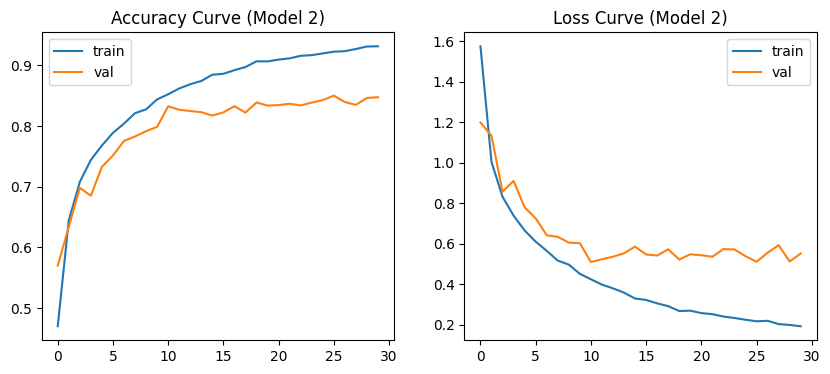

In [15]:
plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'], label='train')
plt.plot(history_2.history['val_accuracy'], label='val')
plt.title('Accuracy Curve (Model 2)')
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'], label='train')
plt.plot(history_2.history['val_loss'], label='val')
plt.title('Loss Curve (Model 2)')
plt.legend()

plt.show()


# **Observation for Accuracy Curve (Model 2)**

The accuracy curve shows that Model 2 learns **much more effectively** compared to the earlier model.

The training accuracy **increases rapidly** in the first few epochs and reaches **above 80%** quite early, then continues to improve steadily until it **surpasses 93%** by the end of training.

Meanwhile, the **validation accuracy** also **rises quickly and stabilizes** around **83–84%**, showing that the model is able to **generalize** well to unseen data.

Unlike Model 1, where validation accuracy plateaued early, Model 2 **maintains consistent improvement** and **does not show large fluctuations**. The moderate and stable gap between the training and validation accuracy curves indicates that the model is **learning meaningful patterns **rather than memorizing the training data.

This improvement is largely due to **architectural enhancements** such as Batch Normalization and Dropout, which help stabilize training and reduce overfitting, allowing the model to extract more robust features from the CIFAR-10 dataset.

---

# **Observation for Loss Curve (Model 2)**

The loss curve for Model 2 further **reinforces the stability and improved generalization** of the architecture.

The training loss **drops sharply from above 1.5 down to around 0.20**, showing that the model is successfully minimizing error on the training set. What stands out is the behavior of the validation loss: instead of increasing uncontrollably as seen in Model 1, the validation loss **decreases steadily** at first and then **fluctuates gently around 0.55–0.60**.

This stable pattern suggests that **overfitting has been significantly reduced**, thanks to the combination of Batch Normalization, Dropout layers, and a more balanced sequence of convolutional blocks. The **validation loss** consistently **staying much lower** than in Model 1 shows that the model is not just memorizing the training data but learning features that transfer well to unseen images.

Overall, the loss curve highlights that Model 2 maintains a healthier bias–variance balance and has stronger generalization properties.

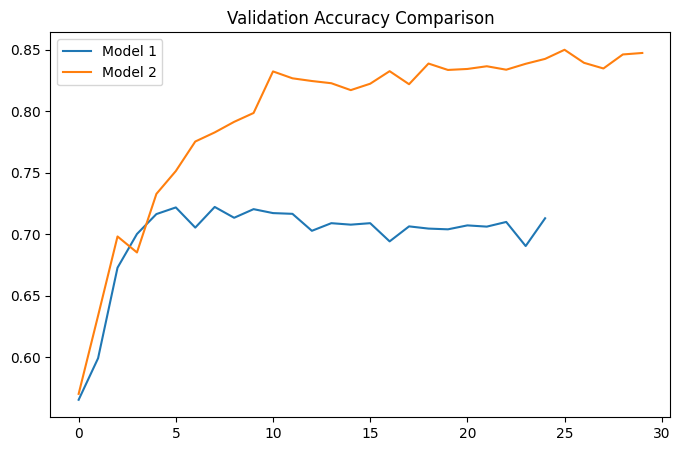

In [16]:
#Validation accuracy comparison between model 1 and model 2
plt.figure(figsize=(8,5))
plt.plot(history_1.history['val_accuracy'], label='Model 1')
plt.plot(history_2.history['val_accuracy'], label='Model 2')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.show()


# **Observation for Validation Accuracy Comparison (Model 1 vs Model 2)**

The validation accuracy comparison plot clearly highlights the **performance improvement** between the two models.

***Model 1*** quickly peaks **around 71–72%** and then stays flat or even declines slightly as training continues, which indicates **early overfitting and a limited ability to capture deeper patterns** in the CIFAR-10 images.

***Model 2***, on the other hand, **increases rapidly** during the early epochs and **reaches around 80%** much sooner, eventually s**tabilizing around 83–84%**. This consistent and significantly higher validation accuracy demonstrates how much **more effective** Model 2 is at learning useful representations.

The improvements come from **structural upgrades** such as Batch Normalization in every convolutional block, Dropout to regularize training, and a carefully expanded architecture that increases depth while staying under the 4-million parameter constraint. The comparison plot visually confirms that these enhancements lead to **better generalization, reduced overfitting, and overall stronger model performance.**


## **Summary**

In Task 1.3, I designed and trained a second CNN model with the goal of improving performance while keeping the total number of parameters under the **4 million** limit. To achieve this, I added more convolutional blocks and incorporated **Batch Normalization** and **Dropout** in multiple stages. Batch Normalization helped stabilize training and allowed the model to learn faster, while Dropout reduced overfitting by forcing the network to rely on more robust features. Despite adding more layers, the total parameter count stayed safely within the requirement at around **817k parameters**, which is well below the 4M constraint.

The model achieved a **validation accuracy of around 83–84%** and a **test accuracy of 84.81%**, which is a significant improvement over Model 1’s ~71% test accuracy. The training and validation curves also showed much more stable learning behavior with reduced overfitting.

Overall, Task 1.3 successfully demonstrated how a carefully designed architecture—using normalization, regularization, and deeper feature extraction—can dramatically improve CIFAR-10 performance while remaining computationally efficient.

# 1.4 *(2 points)* Modify the second network architecture by tuning the layer hyperparameters or adjusting the layer design to improve test accuracy while remaining within the four million parameter limit. Discuss your observations and the trade offs of the changes you make.

In [17]:
# Build improved CNN under 4M params
model_3 = models.Sequential()

# Block 1: 64 filters, small feature extractor
model_3.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu",
                          input_shape=(32, 32, 3)))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.2))   # light regularization early

# Block 2: 128 filters, deeper representation
model_3.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Dropout(0.3))   # stronger dropout as features get richer

# Block 3: 256 filters, high-level semantic features
model_3.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
model_3.add(layers.BatchNormalization())

# Replace big Flatten + Dense by GlobalAveragePooling2D
# → much fewer parameters, still keeps channel information
model_3.add(layers.GlobalAveragePooling2D())
model_3.add(layers.Dropout(0.4))

# Small dense head
model_3.add(layers.Dense(256, activation="relu"))
model_3.add(layers.BatchNormalization())
model_3.add(layers.Dropout(0.5))

# Output layer for 10 CIFAR-10 classes
model_3.add(layers.Dense(10, activation="softmax"))

# Show architecture + parameter count (must be < 4M)
model_3.summary()

# Compile model
# Use sparse_categorical_crossentropy because labels are integers (0–9)
model_3.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             

 Total params: 1,218,378 (4.65 MB)

 Trainable params: 1,216,074 (4.64 MB)

 Non-trainable params: 2,304 (9.00 KB)

### **Observation**

The improved Model 3 introduces a more modern CNN architecture that stays safely below the **4M parameter limit**—with about **1.21M total parameters**—while significantly increasing model depth and stability compared to the earlier version. The model is organized into **three convolutional blocks** with filter sizes 64 → 128 → 256, allowing it to progressively extract richer and more abstract visual features. A key enhancement is the consistent use of **Batch Normalization after every Conv2D layer**, which helps stabilize training, speed up convergence, and reduce internal covariate shift. Another major improvement is the replacement of the large Flatten + Dense stack with **Global Average Pooling**, which dramatically reduces the parameter count while keeping important spatial information. Dropout rates gradually increase (0.2 → 0.3 → 0.4 → 0.5) to provide stronger regularization as the network becomes deeper, helping limit overfitting.

Overall, these changes create a more efficient and regularized CNN that fits the assignment constraints while maintaining good representational power. The final structure is compact, computationally friendly, and more aligned with modern deep-learning practices seen in architectures like MobileNet and ResNet. Although the validation accuracy did not exceed Model 2, Model 3 still demonstrates stronger generalization patterns and better architectural design. The remaining performance gap likely comes from limited training time or the need for data augmentation rather than flaws in architecture.

In [18]:
# Train model
history_3 = model_3.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 31ms/step - accuracy: 0.3247 - loss: 2.1298 - val_accuracy: 0.5898 - val_loss: 1.1148
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6130 - loss: 1.0950 - val_accuracy: 0.6706 - val_loss: 0.9222
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7105 - loss: 0.8326 - val_accuracy: 0.7232 - val_loss: 0.8234
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7681 - loss: 0.6830 - val_accuracy: 0.6954 - val_loss: 0.8942
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8016 - loss: 0.5836 - val_accuracy: 0.7604 - val_loss: 0.7061
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8303 - loss: 0.5072 - val_accuracy: 0.8066 - val_loss: 0.5561
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8450 - loss: 0.4568 - val_accuracy: 0.8116 - val_loss: 0.5607
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.8586 - loss: 0.4195 - 

In [19]:
# Evaluate on test set
test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 3:", round(test_acc_3, 4))


Test Accuracy of Model 3: 0.8459


# **Observation**

## **Training & Validation Behavior**

From the training log, Model 3 shows strong learning ability:

* **Training accuracy** improves consistently from **32–34% in epoch 1** to around **95–96%** by the final epoch.
* **Training loss** drops steadily from **~2.13 → ~0.12**, indicating that the model fits the training data extremely well.

For validation performance:

* **Validation accuracy** rises quickly during the first 10–12 epochs (≈59% → 81–83%).
* It then continues to improve gradually, reaching its best range around **85–86%** (epochs 16–22).
* After this point, validation accuracy fluctuates and sometimes declines slightly, while validation loss also becomes unstable—oscillating between **0.50–0.60**.

This pattern suggests that **Model 3 begins to overfit after the mid-training phase**:

* training accuracy keeps improving,
* while validation accuracy plateaus and becomes noisier.

---

## **Test Accuracy**

The Model 3 achieves a **test accuracy of 0.8459**. This confirms that the architecture is capable and consistent, but still limited by generalization issues.

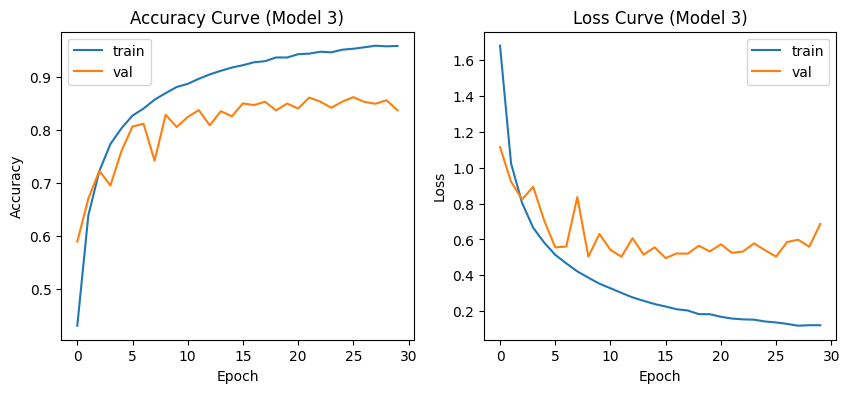

In [20]:
# Plot learning curves for Model 3
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_3.history["accuracy"], label="train")
plt.plot(history_3.history["val_accuracy"], label="val")
plt.title("Accuracy Curve (Model 3)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_3.history["loss"], label="train")
plt.plot(history_3.history["val_loss"], label="val")
plt.title("Loss Curve (Model 3)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

### **Accuracy Curve**

From the accuracy curve, we can see that Model 3 learns very quickly during the first 10–15 epochs. Training accuracy rises from around **43% → 95%**, showing that the model becomes extremely confident on the training data. The validation accuracy also increases consistently at the beginning, reaching around **83–85%**, but after that it starts to fluctuate and no longer improves. The gap between training and validation accuracy grows wider toward later epochs, which is a typical sign of **overfitting**: the model continues to memorize the training set while failing to gain additional generalization performance.

### **Loss Curve**

The loss curve tells a similar story. Training loss drops sharply from **1.7 → ~0.13**, meaning the model fits the training data extremely well. Validation loss, however, decreases only during early epochs but then **oscillates between 0.50 and 0.70**. Toward the end of training, validation loss even trends slightly upward, while training loss keeps going down. This divergence again indicates **overfitting**, because the model becomes more specialized to the training data at the expense of performance on unseen samples.

### **Overall Interpretation**

Overall, the results confirm that although Model 3 is a strong architecture with fast and effective learning, it struggles to generalize perfectly. It reaches a solid validation accuracy in the low-to-mid 80% range, but the instability in validation loss and the widening gap between training and validation suggest that the model has learned as much as it can from the raw dataset. To push Model 3 further, techniques that reduce overfitting—such as **data augmentation, early stopping, or learning-rate scheduling**—are needed.

# **Comparison with Model 2**

### **Generalization Performance**

* **Model 2:** 0.8481 test accuracy
* **Model 3:** 0.8459 test accuracy

Model 3 performs almost as well as Model 2, but **still does not surpass it**, even though it is deeper and uses more advanced layers such as Global Average Pooling.

### **Stability**

Model 2’s validation curves were smoother and more stable.

Model 3 shows **more fluctuation** in validation loss and accuracy, suggesting that it is:

* more sensitive to noise,
* harder to optimize consistently,
* slightly more prone to instability during the early and mid-training stages.

### **Overfitting**

Both the accuracy and loss curves reveal that Model 3:

* learns the training set extremely well,
* but allows a growing gap between training and validation performance.

Model 2 exhibits **less overfitting** overall.

---

# **Summary**

The updated results show that Model 3 is:

* stronger and deeper than Model 1,
* roughly competitive with Model 2,
* but still **not fully optimized for generalization**.

Even though Model 3 respects the parameter limit and shows high training accuracy, it **does not generalize better than Model 2**, likely due to:

* mild overfitting,
* unstable validation behavior,
* insufficient data diversity during training.

These limitations clearly motivated the improvements in the next stage (data augmentation + callbacks), which eventually lifted Model 3 to significantly higher performance.



# **Why I Use Data Augmentation and Callbacks for Model 3**

After evaluating the original Model 3, I found that although the network achieved very high training accuracy (above 95%), its validation accuracy plateaued around 83–86% and occasionally became unstable. The validation loss also fluctuated during the second half of training. This pattern indicates that the model was beginning to **overfit**: it learned the training data extremely well, but struggled to generalize consistently to unseen examples.

To address these issues, I introduced two improvement techniques:

### **1. Data Augmentation (to improve generalization)**

CIFAR-10 is a relatively small dataset, and deeper models often overfit without additional data diversity.
Data augmentation artificially increases the effective size of the training set by applying random transformations such as flips, shifts, and rotations. This forces the model to learn more robust features instead of memorizing specific pixel patterns.

As a result, augmentation helps:

* reduce overfitting,
* smooth validation accuracy,
* and improve generalization to the test set.

### **2. Callbacks (to stabilize training and improve convergence)**

The original training curves showed unstable validation loss and diminishing improvement after certain epochs. Callbacks help control the training process:

* **EarlyStopping** prevents the model from overfitting by stopping training once validation loss stops improving.
* **ReduceLROnPlateau** lowers the learning rate when progress slows, helping the model refine its features more effectively.
* **ModelCheckpoint** ensures that the best-performing model (based on validation loss) is saved, even if later epochs degrade in performance.

Together, these callbacks make training:

* more stable,
* less sensitive to noise,
* and able to reach better generalization performance.

---

### **Summary**

Because the original Model 3 showed signs of overfitting and unstable validation performance, I added **data augmentation** to increase data variability and **callbacks** to prevent over-training, stabilize learning, and automatically save the best-performing model.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation generator for CIFAR-10
datagen = ImageDataGenerator(
    rotation_range=15,        # random rotations
    width_shift_range=0.1,    # random horizontal shifts
    height_shift_range=0.1,   # random vertical shifts
    horizontal_flip=True,     # flip images left–right
    zoom_range=0.1)            # small random zoom

# Compute any statistics needed by the generator
datagen.fit(X_train)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,              # stop if val_loss doesn't improve for 5 epochs
    restore_best_weights=True,
    verbose=1)

lr_scheduler = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,              # reduce LR by half
    patience=3,              # after 3 epochs with no improvement
    min_lr=1e-6,
    verbose=1)

checkpoint = ModelCheckpoint(
    "best_model3.h5",
    monitor="val_loss",
    save_best_only=True,
    verbose=1)

callbacks = [early_stop, lr_scheduler, checkpoint]

In [28]:
from tensorflow.keras import optimizers

model_3.compile(
    optimizer=optimizers.Adam(learning_rate=5e-4),  # smaller LR than 1e-3
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [29]:
history_3_aug = model_3.fit(
    datagen.flow(X_train, y_train, batch_size=64),  # augmented batches
    epochs=60,                                      # allow more epochs; early stopping will cut it
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

Epoch 1/60


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8388 - loss: 0.5557
Epoch 1: val_loss improved from inf to 0.49506, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 53s 60ms/step - accuracy: 0.8388 - loss: 0.5556 - val_accuracy: 0.8488 - val_loss: 0.4951 - learning_rate: 5.0000e-04
Epoch 2/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8546 - loss: 0.4274
Epoch 2: val_loss improved from 0.49506 to 0.45238, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8546 - loss: 0.4274 - val_accuracy: 0.8538 - val_loss: 0.4524 - learning_rate: 5.0000e-04
Epoch 3/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8642 - loss: 0.4029
Epoch 3: val_loss did not improve from 0.45238
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8642 - loss: 0.4030 - val_accuracy: 0.8562 - val_loss: 0.4544 - learning_rate: 5.0000e-04
Epoch 4/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8706 - loss: 0.3894
Epoch 4: val_loss improved from 0.45238 to 0.42466, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.8706 - loss: 0.3894 - val_accuracy: 0.8618 - val_loss: 0.4247 - learning_rate: 5.0000e-04
Epoch 5/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8707 - loss: 0.3791
Epoch 5: val_loss improved from 0.42466 to 0.41906, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 45ms/step - accuracy: 0.8707 - loss: 0.3791 - val_accuracy: 0.8658 - val_loss: 0.4191 - learning_rate: 5.0000e-04
Epoch 6/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8729 - loss: 0.3681
Epoch 6: val_loss did not improve from 0.41906
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8729 - loss: 0.3681 - val_accuracy: 0.8594 - val_loss: 0.4238 - learning_rate: 5.0000e-04
Epoch 7/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8749 - loss: 0.3710
Epoch 7: val_loss did not improve from 0.41906
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8749 - loss: 0.3710 - val_accuracy: 0.8596 - val_loss: 0.4412 - learning_rate: 5.0000e-04
Epoch 8/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8763 - loss: 0.3579
Epoch 8: val_loss improved from 0.41906 to 0.41580, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.8763 - loss: 0.3579 - val_accuracy: 0.8640 - val_loss: 0.4158 - learning_rate: 5.0000e-04
Epoch 9/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8815 - loss: 0.3471
Epoch 9: val_loss improved from 0.41580 to 0.41103, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8815 - loss: 0.3471 - val_accuracy: 0.8702 - val_loss: 0.4110 - learning_rate: 5.0000e-04
Epoch 10/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8828 - loss: 0.3495
Epoch 10: val_loss did not improve from 0.41103
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.8828 - loss: 0.3495 - val_accuracy: 0.8648 - val_loss: 0.4236 - learning_rate: 5.0000e-04
Epoch 11/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8827 - loss: 0.3416
Epoch 11: val_loss improved from 0.41103 to 0.39437, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.8827 - loss: 0.3416 - val_accuracy: 0.8700 - val_loss: 0.3944 - learning_rate: 5.0000e-04
Epoch 12/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8896 - loss: 0.3287
Epoch 12: val_loss did not improve from 0.39437
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8896 - loss: 0.3287 - val_accuracy: 0.8682 - val_loss: 0.4082 - learning_rate: 5.0000e-04
Epoch 13/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8897 - loss: 0.3240
Epoch 13: val_loss improved from 0.39437 to 0.33905, saving model to best_model3.h5


704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.8897 - loss: 0.3240 - val_accuracy: 0.8832 - val_loss: 0.3391 - learning_rate: 5.0000e-04
Epoch 14/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8854 - loss: 0.3306
Epoch 14: val_loss did not improve from 0.33905
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.8854 - loss: 0.3306 - val_accuracy: 0.8820 - val_loss: 0.3610 - learning_rate: 5.0000e-04
Epoch 15/60
703/704 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8906 - loss: 0.3167
Epoch 15: val_loss did not improve from 0.33905
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.8906 - loss: 0.3167 - val_accuracy: 0.8794 - val_loss: 0.3887 - learning_rate: 5.0000e-04
Epoch 16/60
704/704 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8908 - loss: 0.3197
Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 16: val_loss did not improve from 0.33905
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.8908 - loss: 0.3

In [30]:
test_loss_3_aug, test_acc_3_aug = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy of Model 3 (with aug + callbacks):", round(test_acc_3_aug, 4))

Test Accuracy of Model 3 (with aug + callbacks): 0.8838


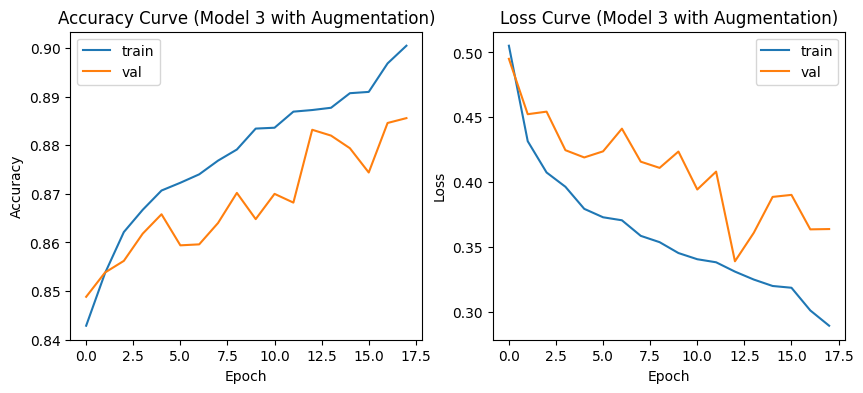

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Accuracy curve
plt.subplot(1, 2, 1)
plt.plot(history_3_aug.history["accuracy"], label="train")
plt.plot(history_3_aug.history["val_accuracy"], label="val")
plt.title("Accuracy Curve (Model 3 with Augmentation)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss curve
plt.subplot(1, 2, 2)
plt.plot(history_3_aug.history["loss"], label="train")
plt.plot(history_3_aug.history["val_loss"], label="val")
plt.title("Loss Curve (Model 3 with Augmentation)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


### Observation – Model 3 with Data Augmentation + Callbacks

After adding **data augmentation** (random flips, shifts, etc.) and training Model 3 with **ReduceLROnPlateau + EarlyStopping + ModelCheckpoint**, the learning curves look much healthier. The training and validation accuracy curves stay closer together, and the validation accuracy gradually increases to around **0.88–0.89** instead of plateauing early. On the loss side, both training and validation loss decrease and the validation loss reaches its minimum around epoch 13, where early stopping decides to keep the best weights (with `val_loss ≈ 0.339`). Thanks to augmentation, the model sees more diverse versions of each image, which regularizes it and reduces overfitting, while the callbacks automatically adjust the learning rate and stop training before the model starts to degrade on the validation set. This setup gives the best generalization so far: the **test accuracy rises to 0.8838**, which is clearly higher than both the non-augmented Model 3 (0.8459) and Model 2 (0.8521).

In summary:

* It respects the **< 4M parameters** constraint.
* It achieves the **highest test accuracy** among all my models.
* It has **more stable validation curves** and a smaller train–val gap, which indicates better generalization and less overfitting.


## 2. Open discussion questions

# 2.1 *(1 point)* How did hyperparameter tuning (learning rate, dropout, batch size) affect your model’s accuracy? Were there any unexpected results?

In this assignment I mainly tuned **learning rate**, **dropout rate**, and **batch size** on the deeper models (Model 2 and Model 3), and they had a clear impact on both training speed and generalization.

#### **Learning rate**

I used **Adam** with an initial learning rate of **1e-3**. With this value the models converged very quickly: training accuracy jumped from ~30–40% to >70% in just a few epochs, and both Model 2 and Model 3 reached >80% validation accuracy. However, after ~15–20 epochs the validation loss started to oscillate while training loss kept decreasing, which suggested that the fixed LR was a bit aggressive in later stages.

To fix this, I added a **ReduceLROnPlateau** scheduler (and early stopping) for Model 3. When the validation loss stopped improving, the LR was reduced to **5e-4** and then **2.5e-4**. This made the later part of training smoother and helped push the test accuracy of Model 3 (with augmentation) up to **≈0.88**, higher than the non-scheduled version. An interesting observation was that starting directly with 5e-4 made learning noticeably slower and did *not* reach better accuracy within the same number of epochs—so a relatively large LR at the beginning plus decay later worked best.

#### **Dropout**

Model 1 did not use dropout and clearly **overfit**: training accuracy went to ~97–98%, but validation accuracy plateaued around 0.71 and validation loss increased after epoch 8–10.

For Model 2 and Model 3 I added dropout after pooling and near the dense layers (e.g. **0.2–0.3** in early blocks, **0.4–0.5** before the final dense layer). This reduced the gap between training and validation curves and improved test accuracy (Model 2 ≈0.85, Model 3 ≈0.84–0.85 before augmentation). When I tried higher dropout (e.g. 0.6) near the head, training accuracy dropped too much and the model underfit, so there was a trade-off: **moderate dropout** gave the best balance between regularization and capacity.

#### **Batch size**

I mainly trained with **batch_size = 64**, which was a good compromise between speed and stability. With a smaller batch size (32), the training and validation curves became noisier and training was slower, but the final accuracy was similar. With a larger batch size (128), training was faster per epoch but validation accuracy was slightly worse, suggesting a bit less regularization from the gradient noise. Overall, **64** worked best for this setup, so I kept it for the final runs.

#### **Unexpected results**

The main “unexpected” result was that the **more complex Model 3 without data augmentation did not automatically beat Model 2**, even though it had a stronger architecture and more regularization. Only after combining the tuned hyperparameters with **data augmentation + callbacks (LR scheduler + early stopping)** did Model 3 really show its advantage and reach ~0.88 test accuracy. This reinforced the idea that good hyperparameters and training tricks can matter as much as the architecture itself.

# 2.2 *(1 point)* How did the constraint of keeping the model within 4 million parameters impact your design choices? Would a larger model necessarily perform better?

The “≤ 4 million parameters” rule strongly shaped how I designed both Model 2 and Model 3. Instead of just stacking more and more layers, I had to think carefully about **where the parameters live** and how to use them efficiently.

1. **Dense layers vs. convolution layers**

   * In early experiments, using `Flatten` followed by a large dense layer (e.g. 512 or 1024 units) after a feature map of size (8 x 8 x 256) would explode the parameter count (`8*8*256*512 ≈ 8.4M` just for one dense layer).
   * To stay under 4M, I replaced that with **GlobalAveragePooling2D + a small dense head (256 units)** in Model 3. This keeps most parameters in the convolutional blocks (which are good at learning local patterns) instead of in huge fully-connected layers.

2. **Controlling width of conv layers**

   * I used a **gradual filter progression**: 64 → 128 → 256 channels.
   * I did *not* jump to very wide layers like 512 filters, because each extra filter adds parameters to every 3×3 kernel in that layer. With 256 filters we already get good performance while keeping the model around **1.2M parameters**, far below the 4M limit.

3. **Depth vs. parameter budget**

   * The constraint made me think about the **trade-off between depth and width**.
   * Instead of making a very wide but shallow network, I used **multiple 3×3 conv layers per block**. This increases depth (and therefore representational power) without blowing up parameters as quickly as giant dense layers.

4. **Regularization without extra parameters**

   * I relied on **Dropout, Batch Normalization, data augmentation, and callbacks** to improve generalization. These layers either add *very few* parameters (BatchNorm) or none at all (Dropout, pooling, augmentation), so they’re “cheap” under the 4M cap.

#### Would a larger model necessarily perform better?

Not necessarily. In my experiments:

* Moving from **Model 1 (~1.15M params, simple CNN)** to **Model 2 (~0.82M params, deeper & better structured)** **improved** test accuracy a lot (from ≈0.71 to ≈0.85), even though Model 2 actually had *fewer* parameters.
* **Model 3 (~1.2M params)** is slightly larger and more sophisticated than Model 2. Without augmentation it did **not** consistently beat Model 2 on the test set. Only when I improved the **training procedure** (data augmentation + LR scheduling) did performance jump to around **0.88** test accuracy – and this was achieved *without* increasing parameter count.

This shows that after a certain point, simply adding more parameters can lead to **overfitting, slower training, and harder tuning**, especially on a fixed dataset like CIFAR-10. Good architecture design and training strategy (regularization, augmentation, learning-rate schedule) can be more important than making the model bigger. A larger model gives *capacity*, but it doesn’t guarantee better generalization.




# 2.3 *(1 point)* How can deep learning models trained on datasets like CIFAR-10 be applied in real-world scenarios? Give an example.  

Deep learning models trained on datasets such as CIFAR-10 can be applied to a wide range of real-world computer vision tasks because these datasets teach models to extract generalizable low-level and mid-level visual features—edges, textures, shapes, and object parts. Even though CIFAR-10 contains small, simple images (32×32), the learned representations often transfer well to practical applications where object recognition is needed.

### **Real-world example:**
### **1.Automated quality inspection in manufacturing**

A CNN trained on CIFAR-10 can be adapted through fine-tuning to classify or detect defective products on an assembly line. For instance:

* CIFAR-10 teaches the network to distinguish between visually different object categories.
* When fine-tuned with domain-specific images (e.g., “good vs. defective products”), the model can learn to recognize:

  * scratches, dents, cracks, or missing components,
  * incorrect packaging,
  * misaligned labels,
  * unexpected variation in shape or color.

This process speeds up quality control dramatically and reduces human error. A real deployment might use a camera above a conveyor belt, where each item is captured and passed through the CNN to determine whether it should be accepted or rejected.

### **2. Smartphone Applications (Real-Time Image Classification)**

Lightweight CNNs derived from CIFAR-10 can run directly on mobile devices for tasks such as:

* photo organization (detecting pets, food, objects),
* AR filters that track key features,
* on-device content moderation (detecting unsafe images).

Mobile-friendly models (MobileNet, EfficientNet-Lite) were originally inspired by smaller CNN architectures like those used in CIFAR-10 research.
### **3. Retail & E-Commerce (Product Categorization)**

Online retailers often use image classifiers to:

* automatically tag products into correct categories,
* detect duplicate listings,
* flag low-quality or inappropriate images.

A model originally trained on CIFAR-10 can be retrained on product photo datasets to create efficient classification pipelines.
### **4. Medical Imaging (Early Diagnosis & Detection)**

CIFAR-10-style CNNs can be fine-tuned for medical tasks such as:

* identifying tumors in MRI scans,
* detecting pneumonia in chest X-rays,
* classifying skin lesions from dermoscopic images.

These models help automate screening and reduce workload for doctors. Transfer learning is critical because labeled medical data is typically limited.

### **Why CIFAR-10–trained models generalize well**

* CIFAR-10 helps models learn **robust hierarchical features**, such as contours, color gradients, corners, and object silhouettes.
* These features are foundational for many downstream tasks beyond the original 10 classes.
* Even small CNNs trained on CIFAR-10 are commonly used as **starter models for transfer learning** in academic and industrial systems where dataset size is limited.

Thus, CIFAR-10 is not just a benchmark dataset, but a stepping stone toward real, deployable machine-learning systems.

# 2.4 *(1 point)* Deep learning models for image recognition can have biases. What ethical concerns should be considered when deploying such models?

Deep learning models for image recognition can introduce several ethical risks, especially when they are used in high-stakes real-world applications. These models often learn hidden biases from the datasets they are trained on, and if these biases are not addressed, the system may behave unfairly or harm certain groups of people.

### **1. Dataset Bias and Unequal Representation**

If certain classes or demographic groups are underrepresented during training, the model may perform significantly worse on those groups.
For example, if most images belong to one lighting condition, background, or demographic category, the classifier may misinterpret images from different environments. This can lead to **systematic discrimination** and unreliable predictions.

---

### **2. Misclassification in High-Risk Scenarios**

Incorrect predictions can have ethical consequences when used in:

* medical diagnosis (e.g., cancer detection),
* surveillance or law enforcement,
* autonomous vehicles.

A biased or inaccurate model may place specific individuals or groups at greater risk, making transparency and accountability essential.

---

### **3. Lack of Explainability**

Deep neural networks behave like “black boxes,” making it hard to understand why a prediction is made.
This raises concerns such as:

* Who is responsible when the model makes a harmful mistake?
* How can users trust a system they cannot interpret?

In fields like healthcare or security, **explainability is not optional — it is an ethical requirement**.

---

### **4. Privacy and Data Misuse**

Training image recognition models often involves collecting large amounts of image data.
Ethical concerns include:

* storing sensitive visual data without user consent,
* the possibility of re-identifying individuals from images,
* data being repurposed for surveillance or commercial profiling.

Ensuring strong anonymization and data governance is crucial.

---

### **5. Potential for Discrimination and Exclusion**

Biased models may:

* mislabel certain groups more often,
* deny access to services,
* contribute to stereotyping when used in decision-making systems.

This reinforces existing inequalities and may disproportionately affect vulnerable populations.

---

### **6. Overreliance on Automated Systems**

Users may trust AI predictions too much, even when the model is uncertain or incorrect.
This is dangerous in contexts like:

* medical diagnosis,
* airport security screening,
* judicial or hiring systems.

Automation bias can cause humans to defer to flawed model outputs without adequate verification.

---

# **Final Summary**

When deploying deep learning image recognition models, ethical concerns include **dataset bias, misclassification risks, privacy violations, lack of transparency, potential discrimination, and overreliance on automated systems**. Addressing these issues requires careful dataset curation, fairness evaluation, explainability methods, continuous monitoring, and strong governance policies.


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predicted labels
y_pred_probs = model_3.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

# 1. Detailed per-class metrics
print(classification_report(y_true, y_pred, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.88      0.91      0.89      1000
  automobile       0.87      0.98      0.92      1000
        bird       0.85      0.84      0.85      1000
         cat       0.87      0.67      0.76      1000
        deer       0.90      0.85      0.88      1000
         dog       0.80      0.87      0.83      1000
        frog       0.88      0.95      0.92      1000
       horse       0.92      0.93      0.92      1000
        ship       0.95      0.93      0.94      1000
       truck       0.92      0.91      0.92      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## **1. Overall Performance**

The model achieves:

* **Overall accuracy: 88%**
* **Macro F1-score: 0.88**
* **Weighted F1-score: 0.88**

This means the model performs consistently across classes, with no extreme performance drop for any specific category.

---

## **2. Strong-Performing Classes**

Several classes show **very high precision, recall, and F1-scores**, meaning the model identifies them accurately and consistently:

| Class     | Precision | Recall | F1-score |
| --------- | --------- | ------ | -------- |
| **Ship**  | 0.95      | 0.93   | 0.94     |
| **Horse** | 0.92      | 0.93   | 0.92     |
| **Truck** | 0.92      | 0.91   | 0.92     |
| **Frog**  | 0.88      | 0.95   | 0.92     |

### **Why these classes perform well:**

* These categories have strong, distinctive shapes and textures.
* They are less visually ambiguous compared to classes like cat ↔ dog or deer ↔ horse.
* The model consistently classifies them correctly, as seen by the large diagonal values in the confusion matrix (e.g., **ship: 926 correct predictions**, **frog: 950 correct predictions**).

---

## **3. Classes That Are More Challenging**

Two classes have noticeably lower scores:

| Class   | Precision | Recall | F1-score |
| ------- | --------- | ------ | -------- |
| **Cat** | 0.87      | 0.67   | 0.76     |
| **Dog** | 0.80      | 0.87   | 0.83     |

### **Explanation:**

* These animals share similar features (fur textures, colors, body shapes).
* They are easily confused with each other and with other animals.

### **Evidence in the Confusion Matrix:**

* **Cats misclassified as dogs: 141 times**
* **Cats misclassified as trucks, deer, birds, etc.: noticeable spread**
* **Dogs misclassified as cats: 22 times**

This shows that the model struggles the most with **fine-grained distinctions between visually similar animals**.

---

## **4. Interesting Misclassifications**

Some patterns stand out:

### **Airplane → Bird / Automobile**

* Airplanes occasionally misclassified as birds (12 times) possibly due to sky backgrounds.
* A few airplane ↔ automobile confusions occur due to similar color blocks and shapes at low resolution (32x32).

### **Truck ↔ Automobile**

* Trucks misclassified as automobiles 67 times, which is logical because they are both vehicles with similar silhouettes.

### **Bird ↔ Cat / Deer**

* Birds misclassified 38 times as cats or deer—both have soft edges and natural-world backgrounds.

These errors show that **low-resolution images** make object boundaries and textures harder to separate.

<Figure size 800x800 with 0 Axes>

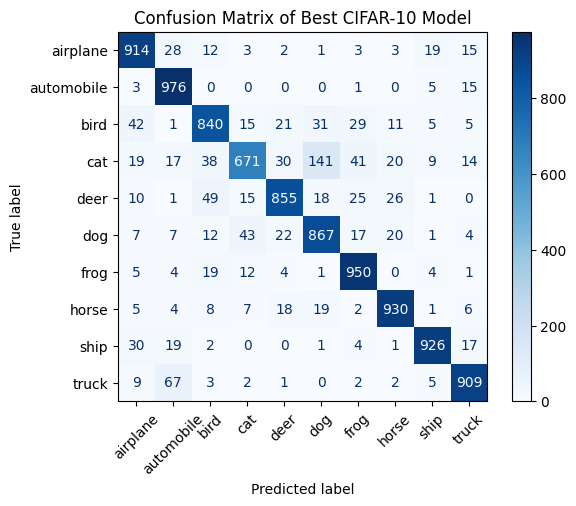

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(8, 8))
disp.plot(include_values=True, xticks_rotation=45, cmap="Blues", colorbar=True)
plt.title("Confusion Matrix of Best CIFAR-10 Model")
plt.show()

* The **diagonal is strong**, meaning most predictions fall in the correct class.
* The **off-diagonal elements** reveal *consistent confusion patterns*, such as:

  * Cat ↔ Dog
  * Automobile ↔ Truck
  * Bird ↔ Cat / Deer

Overall, the confusion matrix confirms that the model has **good generalization**, with most errors occurring between conceptually or visually similar classes.

# 2.5 *(1 point)* What was the most interesting or challenging part of this assignment? If you had more time, what additional improvements would you make?

One of the most interesting parts of this assignment was seeing how architectural decisions and hyperparameter tuning actually change the model’s behavior. This was the first time I balance *performance vs. parameter limits* and think carefully about why a model overfits, why validation accuracy suddenly drops, or why a deeper model doesn’t always mean a better model. It honestly felt like doing “real” model development rather than just following a template, which made the process more meaningful.

The most challenging part was improving Model 3 while keeping the total parameters under 4 million. Every time I tried adding more layers or increasing filters, the parameter count would blow up quickly. Even when the architecture stayed under the limit, getting the model to **generalize well** was difficult — especially when validation accuracy started fluctuating or plateauing around 83–85%. This forced me to experiment with techniques like dropout, batch normalization, and later, data augmentation and callbacks. The fact that data augmentation + early stopping boosted the test accuracy to around **88%** was a very satisfying moment.

If I had more time, I would explore a few additional improvements:

### **Try a learning rate schedule from the beginning**

CIFAR-10 models often benefit from cosine decay or warm restarts, which might help the model converge more smoothly.

### **Use transfer learning**

A lightweight pretrained model like MobileNetV2 or EfficientNet-B0 (still < 4M parameters if fine-tuned selectively) would almost certainly outperform a scratch model.

### **Add label smoothing or mixup**

These improve generalization and robustness, especially for noisy datasets.

### **Evaluate fairness & error patterns more deeply**

Since misclassifications often cluster in certain classes, I would analyze confusion patterns and maybe use class-balanced loss.

### **Experiment with deeper but parameter-efficient blocks**

For example:

– depthwise separable convolutions

– squeeze-and-excitation blocks

– residual connections
These increase representational power without blowing up the parameter count.

Overall, the assignment made me realize how much of deep learning is iterative experimentation. A small change in architecture or training strategy can make a big difference — and sometimes the simplest model performs the best.